# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
def find_sum(a,d,N):
    sum = 0
    memb = a
    for i in range(N):
      sum += memb
      memb += d
    return sum

Check yourself

In [3]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [4]:
def check_prime(N):
    if (N <= 0):
      return False
    if (N == 1):
      return False
    for i in range(N - 3):
      if (N % (i + 2) == 0):
        return False
    return True

Check yourself

In [5]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [6]:
def find_primes(N):
    ans = []
    i = 0
    k = 2
    while (i < N):
      if (check_prime(k)):
        ans.append(k)
        i += 1
      k += 1

    return ans

Check yourself

In [10]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [11]:
def find_max(a, b, c):
    if(a >= b and a >= c):
      return a
    if(b >= a and b >= c):
      return b
    if(c >= a and c >= b):
      return c

Check yourself

In [12]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (-33, 93, 3)
Checking on (-8, 77, 88)
Checking on (-98, 92, 80)
Checking on (-38, 53, 20)
Checking on (-42, 14, 13)
Checking on (85, -78, -13)
Checking on (95, -48, -49)
Checking on (-65, -82, 75)
Checking on (35, -95, -17)
Checking on (-50, -94, 34)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [13]:
my_array = np.random.rand(20)
my_array = my_array * 3 / np.sum(my_array)
## Your code here

Check yourself

In [14]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [15]:
def cal_euclidean(a, b):    
  return np.sqrt(np.dot(a- b, a - b))
    

def cal_manhattan(a, b):
  return np.sum(np.abs(a - b))  

    
def cal_cosine(a, b): 
  return 1 - np.dot(np.transpose(a), b) /  np.sqrt(np.dot(a, a)) / np.sqrt(np.dot(b, b))
  ## Your code here

Check yourself

In [16]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [17]:
def custom_scaler(my_array):
    my_array = my_array - np.min(my_array)
    my_array = my_array / np.max(my_array) * 4
    my_array = my_array - 2
    return my_array

Check yourself

In [18]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[ -5  -2 -45  66] ->> [-0.55855856 -0.45045045 -2.          2.        ]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [19]:
my_array = np.random.rand(5, 6) * 50 ## Your code here
selected_column = np.where(my_array == np.max(my_array))[1][0]## Your code here

In [20]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[25.58279967 11.56247018  6.06711225 19.37569987 46.59698868  7.69884544]
 [11.78126323 44.10465507 37.24069175 47.66457847 32.54046427  0.48343984]
 [11.76522895 33.14393582 41.66997961 48.73026714 22.71016148  5.52915251]
 [ 9.97210386 18.95811524 11.09552007 11.21805609 16.76585286 49.60735336]
 [ 7.60479449 28.57478265  1.88302136 18.03940406 46.55019273 24.46409214]]
Shape: (5, 6)
Selected column 5


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [21]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [0.54 0.8  0.04 0.57 0.02 0.21  nan  nan  nan 0.2 ]


In [22]:
## Your code here
mean = np.nanmean(arr)
index = np.where(np.isnan(arr))
arr[index]= mean
print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.54 0.8  0.04 0.57 0.02 0.21 0.34 0.34 0.34 0.2 ]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [49]:
def mean_channel(X):
  n = X.shape[0]
  m = X.shape[1]
  resh = np.reshape(X, (n*m, 3))
  return np.mean(resh, axis = 1)

In [27]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([ 5.66666667, -1.        ,  2.33333333,  2.33333333,  2.        ,
        2.66666667,  2.        , -1.33333333,  2.66666667, -3.66666667,
        1.33333333, -5.        , -3.33333333,  1.66666667, -3.66666667,
        5.33333333, -3.        , -0.66666667, -2.        , -4.        ,
       -5.33333333,  0.33333333, -7.66666667, -3.        , -4.33333333,
       -3.33333333,  5.33333333,  4.33333333, -1.66666667,  1.        ,
       -4.66666667, -7.33333333, -4.        ,  7.        ,  3.        ,
        2.33333333,  0.66666667,  2.        , -3.66666667, -0.33333333,
        5.        , -2.66666667, -3.        , -8.33333333,  1.66666667,
        1.        ,  5.33333333, -2.        ,  1.33333333, -2.33333333,
       -4.        , -5.33333333,  2.        ,  3.33333333,  0.        ,
       -7.66666667,  4.        ,  3.        , -4.        , -2.        ,
       -1.66666667, -2.        , -1.        ,  0.33333333,  1.        ,
       -4.33333333, -0.33333333,  6.66666667, -2.33333333,  0.  

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [63]:
def get_unique_rows(X):
    n = X.shape[0]
    m = X.shape[1]
    k = X.shape[2]
    resh = X.reshape((n, m*k))
    ans = np.unique(resh, axis = 0)
    return ans.reshape(ans.shape[0], m, k)

In [66]:
X =  np.random.randint(4, 6, size=(6, 2, 2))
print(X)
get_unique_rows(X)

[[[5 4]
  [4 4]]

 [[5 4]
  [5 4]]

 [[4 4]
  [5 4]]

 [[5 4]
  [4 4]]

 [[5 4]
  [5 4]]

 [[4 5]
  [5 4]]]


array([[[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [5, 4]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [22]:
dataset = pd.read_csv('titanic.csv') ## Your code here
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [23]:
## Your code here
print(dataset.isna().any()) # в колонках Age, Cabin, Embarked отсутствуют некоторые значения

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [24]:
print(len(pd.unique(dataset.Pclass))) # всего 3 класса на корабле

3


In [25]:
surv = dataset[dataset['Survived'] == 1]
print(round(len(surv) / len(dataset) * 100, 2), '% выжило на корабле')
print(round(len(surv[surv['Pclass'] == 1]) / len(dataset) * 100, 2), '% первого класса выжило на корабле')
print(round(len(surv[surv['Pclass'] == 2]) / len(dataset) * 100, 2), '% второго класса выжило на корабле')
print(round(len(surv[surv['Pclass'] == 3]) / len(dataset) * 100, 2), '% третьего класса выжило на корабле')
print('Процент выживших первого класса наибольший, а второго класса наименьший. Явно выраженной связи между выживанием и классом не видно')

38.38 % выжило на корабле
15.26 % первого класса выжило на корабле
9.76 % второго класса выжило на корабле
13.36 % третьего класса выжило на корабле
Процент выживших первого класса наибольший, а второго класса наименьший. Явно выраженной связи между выживанием и классом не видно


In [26]:
print('Средняя цена билета:', round(dataset['Fare'].mean(), 2))

Средняя цена билета: 32.2


In [34]:
print(dataset.groupby('Embarked')['PassengerId'].nunique())
#самый популятный порт - S

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [37]:
## Your code here

---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

Минимальный возраст на корабле: 0.42
Минимальный возраст на корабле: 80.0
Средний возраст на корабле: 29.7


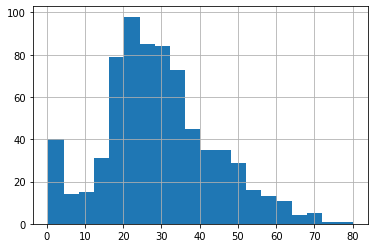

In [48]:
## Your code here
print('Минимальный возраст на корабле:', dataset['Age'].min())
print('Минимальный возраст на корабле:', dataset['Age'].max())
print('Средний возраст на корабле:', round(dataset['Age'].mean(), 2))
dataset['Age'].hist(bins = 20)


По гистограмме можно определить, что средний возраст на корабле около 30 лет.
На кораюле присутствовали люди от 0 лет до 80.
Большая часть людей в возрасте от 15 до 35 лет.
Распределение соответствует нормальному распределению.

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

Средний возраст для выживших на корабле: 28.34


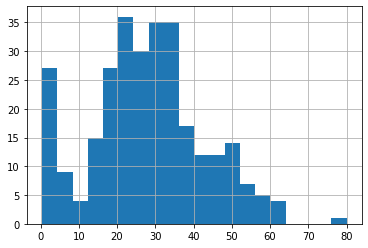

In [74]:
## You code here
print('Средний возраст для выживших на корабле:', round(dataset[dataset['Survived'] == 1]['Age'].mean(), 2))
dataset[dataset['Survived'] == 1]['Age'].hist(bins = 20)# распределение по возрастам для выживших

Средний возраст для выживших на корабле: 30.63


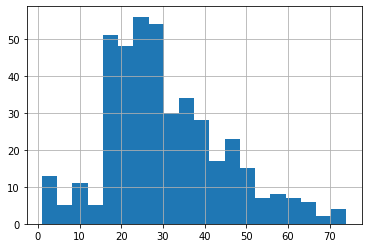

In [75]:
print('Средний возраст для выживших на корабле:', round(dataset[dataset['Survived'] == 0]['Age'].mean(), 2))
dataset[dataset['Survived'] == 0]['Age'].hist(bins = 20)# распределение по возрастам для невыживших

Распределение по возрастам между выжившими и невыжившими на корабле примепрно одинаково. Однако некоторых категорий выживших нет, например, в возрасте от 65 до 75. Молодых людей больше выжило, чем умерло.

---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



Построим ящики с усами для цен каждого из портов. Они покажут распределение цен.

Средняя цена билета для порта C 59.95


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


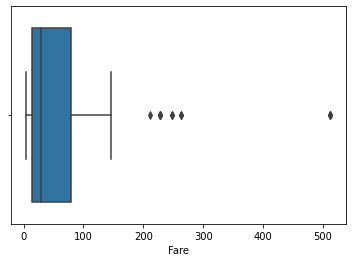

In [84]:
print('Средняя цена билета для порта C', round(dataset[dataset['Embarked'] == 'C']['Fare'].mean(), 2))
sns.boxplot(dataset[dataset['Embarked'] == 'C']['Fare'])

Средняя цена билета для порта S 27.08


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


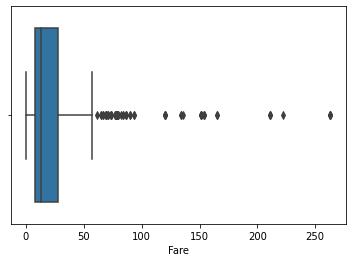

In [85]:
print('Средняя цена билета для порта S', round(dataset[dataset['Embarked'] == 'S']['Fare'].mean(), 2))
sns.boxplot(dataset[dataset['Embarked'] == 'S']['Fare'])

Средняя цена билета для порта Q 13.28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


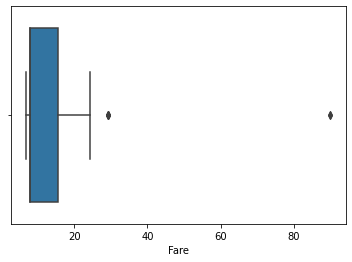

In [87]:
print('Средняя цена билета для порта Q', round(dataset[dataset['Embarked'] == 'Q']['Fare'].mean(), 2))
sns.boxplot(dataset[dataset['Embarked'] == 'Q']['Fare'])

Порт коррелирует с ценой за билет на корабль. Самые дорогие билеты на порт C, средней стоимости на порт S, самые дешевые на порт Q. Больше всего выбросов цен на порту S.

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

Средняя цена билета для класса 1 84.15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


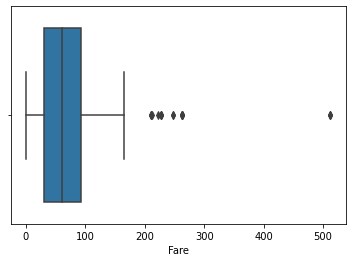

In [88]:
print('Средняя цена билета для класса 1', round(dataset[dataset['Pclass'] == 1]['Fare'].mean(), 2))
sns.boxplot(dataset[dataset['Pclass'] == 1]['Fare'])

Средняя цена билета для класса 2 20.66


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


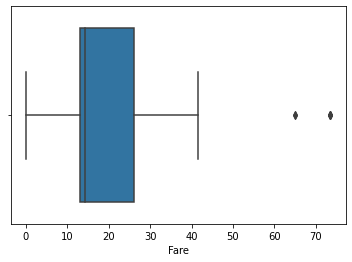

In [89]:
print('Средняя цена билета для класса 2', round(dataset[dataset['Pclass'] == 2]['Fare'].mean(), 2))
sns.boxplot(dataset[dataset['Pclass'] == 2]['Fare'])

Средняя цена билета для класса 3 13.68


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


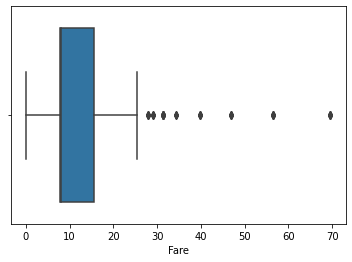

In [90]:
print('Средняя цена билета для класса 3', round(dataset[dataset['Pclass'] == 3]['Fare'].mean(), 2))
sns.boxplot(dataset[dataset['Pclass'] == 3]['Fare'])